### DECESION TREE CLASSIFIER

In [1]:
#### LOADING APPROPRIATE PACKAGES


In [2]:
#import six
#import sys
#sys.modules['sklearn.externals.six'] = six


In [14]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
import pandas as pd
import plotly.express as px
from pydotplus import graph_from_dot_data
from IPython.display import Image

ModuleNotFoundError: No module named 'plotly'

To turn of scientific notation for the floating points.

In [ ]:
np.set_printoptions(suppress=True)

LOADING EXTERNAL DATA , USE PANDA TO CONVERT CSV DATA FILE TO PANDA DATA FRAME

In [29]:
df = pd.read_csv('data_decision_trees.csv')

#### CHECK THE CONTENT OF THE DATA .....



In [30]:
df

,Feature 01,Feature 02,Feature 03,Feature 04,Feature 05,Feature 06,Feature 07,Label
0,0.269186,2.890367,1.893983,-0.420737,-0.828978,-3.815491,-1.219257,B
1,-1.327319,-1.762721,1.031584,2.766727,-3.174990,-1.395544,-3.284436,D
2,0.107028,3.964838,1.073601,0.758348,1.570392,-0.401011,3.332441,C
3,-2.294776,-3.894267,-0.571486,3.067353,2.892005,-0.235421,-1.292745,A
4,-1.635072,4.305268,0.101267,-5.335998,1.072216,1.286368,4.741389,A
...,...,...,...,...,...,...,...,...
1865,-0.478231,2.201073,-1.444069,-2.515373,1.695445,4.027665,1.092670,B
1866,0.888738,-2.017106,2.039652,2.001606,1.426542,1.720450,0.886203,B
1867,-3.077087,1.400107,0.663180,3.309129,0.672774,2.550213,0.038810,C
1868,0.803133,1.580357,0.054739,2.958573,3.340849,-1.811113,0.176597,C


In [31]:
df.shape

(1870, 8)

#### VISUALIZE DATA
Visulization above thee dimensions is not possible so we can visulize two features vs classification by color index thus each of the seven feature can be ploted with other seven feature with output as colour index
Image size can be 256pixel*8

In [32]:
data_dimensions = df.columns[:-1].to_list()
figure_size = df.shape[1] * 256
fig = px.scatter_matrix(df, dimensions=data_dimensions, color='Label', width=figure_size, height=figure_size)
fig.show()

#### SEPEARATE FEATURE MATRIX "X" AND OUTPUT VECTOR "y"

In [33]:
X = df.drop('Label', axis=1).to_numpy()
y = df['Label'].to_numpy()

### EXPLORE X and y and its dimensions

In [36]:
X

array([[ 0.26918561,  2.89036704,  1.89398331, ..., -0.82897781,
        -3.81549087, -1.21925709],
       [-1.32731927, -1.76272079,  1.03158355, ..., -3.17499021,
        -1.39554398, -3.28443589],
       [ 0.10702806,  3.96483754,  1.07360074, ...,  1.57039201,
        -0.40101058,  3.33244142],
       ...,
       [-3.07708661,  1.40010747,  0.66318026, ...,  0.67277394,
         2.55021337,  0.03881049],
       [ 0.80313316,  1.58035675,  0.05473856, ...,  3.34084891,
        -1.81111266,  0.17659685],
       [-0.48022462,  3.95286668,  0.88674666, ...,  2.57476504,
         0.23366233,  3.80325314]])

In [37]:
X.shape

(1870, 7)

In [38]:
y

array(['B', 'D', 'C', ..., 'C', 'C', 'D'], dtype=object)

In [39]:
y.shape

(1870,)

#### SPLITTING DATA IN TRAINING (60%), VALDATION(20%) AND TESTING SET(20%)

In [40]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

### BUILDING AND FITTING DECISION TREE

In [43]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)


### VISUALIZATION OF DECISION TREE

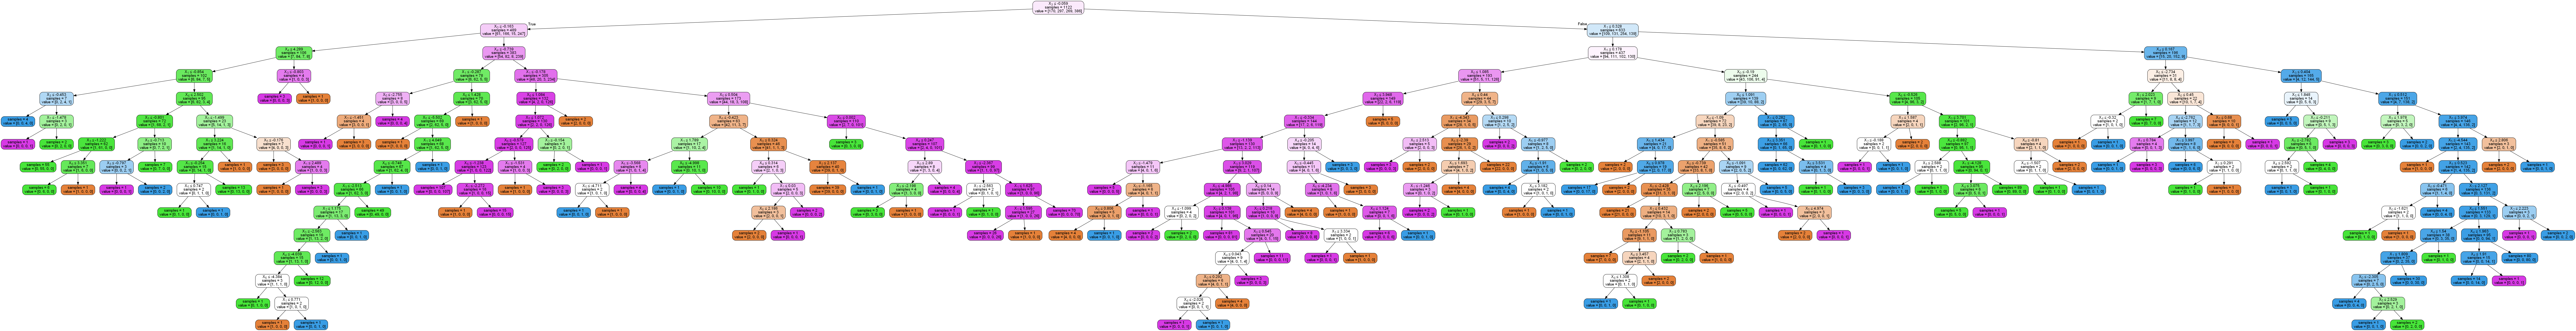

In [44]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)

### MODEL ASSESESMENT AND SELECTION
Checking Predicted output for training set yhat_train with actual y_train, accuracy_score

In [45]:
yhat_train = dtree.predict(X_train)
accuracy_score(yhat_train, y_train)

1.0

#### accuracy score =1  indicates 100% accuracy its due to memorizing all the training data due to min leaf no = 1, same accuracy we cant get for the validation set, lets check it

In [46]:
yhat_validation = dtree.predict(X_validation)
accuracy_score(yhat_validation,y_validation)

0.8155080213903744

#### Acciracy score = 0.81 indicates we wont get same accuracy for unseen data...

#### Model with min leaf no = 15 , checking training, validation and testing accuracy

In [47]:
dtree2 = DecisionTreeClassifier(min_samples_leaf=15)
dtree2 = dtree2.fit(X_train,y_train)
dtree2

DecisionTreeClassifier(min_samples_leaf=15)

In [48]:
yhat_train2 = dtree2.predict(X_train)
accuracy_score(yhat_train2, y_train)

0.8440285204991087

In [49]:
yhat_validation2 = dtree2.predict(X_validation)
accuracy_score(yhat_validation2,y_validation)

0.7887700534759359

#### EVALUATING DECISION TREE

In [50]:
yhat_test2 = dtree2.predict(X_test)
accuracy_score(yhat_test2,y_test)

0.7647058823529411

### With leaf no 15, generalizes model well indicating training accuracy 0.84, validation accuracy 0.788 and very close testing accuracy 0.764
This indicates model is not overfetting like model dtree